# Biometric Updates

This notebook is for updating and analyzing the Aadhaar biometric data.

In [1]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt

# 1. CONSISTENT VISUAL IDENTITY
sns.set_theme(style="whitegrid")
plt.rcParams.update({
    "figure.figsize": (12, 6),
    "axes.titlesize": 16,
    "axes.labelsize": 12,
    "axes.titleweight": 'bold',
    "font.size": 11,
    "legend.fontsize": 10
})

# Color Palette Discipline
PALETTE_ENROL = ["#2c3e50", "#3498db", "#95a5a6"] # Deep Blues/Greys
PALETTE_STRESS = ["#bdc3c7", "#e74c3c"]          # Grey (Normal) vs Red (Risk)

In [3]:
# =========================================================
# PHASE 1 — DATA UNDERSTANDING : BIOMETRIC UPDATE DATA
# =========================================================

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 150)

# ---------------------------------------------------------
# 1. LOAD ALL CSV FILES USING GLOB (WITH DEBUG)
# ---------------------------------------------------------
folder_path = "api_data_aadhar_biometric/*/*.csv"  # handles nested folders safely
files = glob.glob(folder_path)

print("FILES FOUND:")
for f in files:
    print(f)

print(f"\nTotal CSV files found: {len(files)}")

bio_df = pd.concat(
    [pd.read_csv(file) for file in files],
    ignore_index=True
)

print("\nBiometric Update dataset loaded successfully!")
print("-" * 60)

# ---------------------------------------------------------
# 2. PREVIEW DATA
# ---------------------------------------------------------
display(bio_df.head())
print("-" * 60)

# ---------------------------------------------------------
# 3. STRUCTURAL INFORMATION
# ---------------------------------------------------------
print("INFO:")
bio_df.info()
print("-" * 60)

# ---------------------------------------------------------
# 4. STATISTICAL SUMMARY
# ---------------------------------------------------------
display(bio_df.describe())
print("-" * 60)

# ---------------------------------------------------------
# 5. COLUMN LIST
# ---------------------------------------------------------
print("COLUMNS:")
print(list(bio_df.columns))
print("-" * 60)

# ---------------------------------------------------------
# 6. IDENTIFY KEY COLUMNS (ROBUST)
# ---------------------------------------------------------
state_col = "state"
date_col = "date"

# Parse date and derive year/month
bio_df[date_col] = pd.to_datetime(bio_df[date_col], errors="coerce")
bio_df["year"] = bio_df[date_col].dt.year
bio_df["month"] = bio_df[date_col].dt.month

# Identify biometric age-group columns
bio_cols = [c for c in bio_df.columns if c.startswith("bio_")]

print(f"State Column        : {state_col}")
print(f"Date Column         : {date_col}")
print(f"Derived Year Column : year")
print(f"Biometric Columns   : {bio_cols}")
print("-" * 60)

# ---------------------------------------------------------
# 7. UNIQUE VALUES EXPLORATION
# ---------------------------------------------------------
print("UNIQUE STATES:", bio_df[state_col].nunique())
print("YEAR RANGE:", bio_df["year"].min(), "-", bio_df["year"].max())
print("BIOMETRIC AGE GROUP COLUMNS:")
print(bio_cols)
print("-" * 60)

# ---------------------------------------------------------
# 8. MISSING VALUES CHECK
# ---------------------------------------------------------
print("MISSING VALUES PER COLUMN:")
display(bio_df.isnull().sum())
print("-" * 60)

# ---------------------------------------------------------
# 9. DATA DICTIONARY (ACCURATE)
# ---------------------------------------------------------
bio_dictionary = pd.DataFrame({
    "Column Name": bio_df.columns,
    "Meaning": [
        "Date of biometric update record" if c == "date" else
        "Indian State / UT" if c == "state" else
        "District name" if c == "district" else
        "Pincode of update location" if c == "pincode" else
        "Derived year from date" if c == "year" else
        "Derived month from date" if c == "month" else
        "Count of biometric updates for specific age group"
        for c in bio_df.columns
    ],
    "Notes": ["Aggregated, anonymised"] * len(bio_df.columns)
})

display(bio_dictionary)

# ---------------------------------------------------------
# 10. PHASE 1 SUMMARY (FOR PDF)
# ---------------------------------------------------------
print("""
PHASE 1 OBSERVATIONS — BIOMETRIC UPDATE DATA
• Dataset is date-based; year and month derived from date
• Aggregated biometric update counts by age group
• No personally identifiable information
• Enables biometric stress and anomaly analysis
• Suitable for univariate, bivariate, and multivariate analysis
""")


FILES FOUND:
api_data_aadhar_biometric\api_data_aadhar_biometric\api_data_aadhar_biometric_0_500000.csv
api_data_aadhar_biometric\api_data_aadhar_biometric\api_data_aadhar_biometric_1000000_1500000.csv
api_data_aadhar_biometric\api_data_aadhar_biometric\api_data_aadhar_biometric_1500000_1861108.csv
api_data_aadhar_biometric\api_data_aadhar_biometric\api_data_aadhar_biometric_500000_1000000.csv

Total CSV files found: 4

Biometric Update dataset loaded successfully!
------------------------------------------------------------


,date,state,district,pincode,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,123029,280,577
1,01-03-2025,Bihar,Madhepura,852121,144,369
2,01-03-2025,Jammu and Kashmir,Punch,185101,643,1091
3,01-03-2025,Bihar,Bhojpur,802158,256,980
4,01-03-2025,Tamil Nadu,Madurai,625514,271,815


------------------------------------------------------------
INFO:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861108 entries, 0 to 1861107
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   date          object
 1   state         object
 2   district      object
 3   pincode       int64 
 4   bio_age_5_17  int64 
 5   bio_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 85.2+ MB
------------------------------------------------------------


,pincode,bio_age_5_17,bio_age_17_
count,1.861108e+06,1.861108e+06,1.861108e+06
mean,5.217612e+05,1.839058e+01,1.909413e+01
std,1.981627e+05,8.370421e+01,8.806502e+01
min,1.100010e+05,0.000000e+00,0.000000e+00
25%,3.911750e+05,1.000000e+00,1.000000e+00
50%,5.224010e+05,3.000000e+00,4.000000e+00
75%,6.866362e+05,1.100000e+01,1.000000e+01
max,8.554560e+05,8.002000e+03,7.625000e+03


------------------------------------------------------------
COLUMNS:
['date', 'state', 'district', 'pincode', 'bio_age_5_17', 'bio_age_17_']
------------------------------------------------------------
State Column        : state
Date Column         : date
Derived Year Column : year
Biometric Columns   : ['bio_age_5_17', 'bio_age_17_']
------------------------------------------------------------
UNIQUE STATES: 57
YEAR RANGE: 2025.0 - 2025.0
BIOMETRIC AGE GROUP COLUMNS:
['bio_age_5_17', 'bio_age_17_']
------------------------------------------------------------
MISSING VALUES PER COLUMN:


date            944100
state                0
district             0
pincode              0
bio_age_5_17         0
bio_age_17_          0
year            944100
month           944100
dtype: int64

------------------------------------------------------------


,Column Name,Meaning,Notes
0,date,Date of biometric update record,"Aggregated, anonymised"
1,state,Indian State / UT,"Aggregated, anonymised"
2,district,District name,"Aggregated, anonymised"
3,pincode,Pincode of update location,"Aggregated, anonymised"
4,bio_age_5_17,Count of biometric updates for specific age group,"Aggregated, anonymised"
5,bio_age_17_,Count of biometric updates for specific age group,"Aggregated, anonymised"
6,year,Derived year from date,"Aggregated, anonymised"
7,month,Derived month from date,"Aggregated, anonymised"



PHASE 1 OBSERVATIONS — BIOMETRIC UPDATE DATA
• Dataset is date-based; year and month derived from date
• Aggregated biometric update counts by age group
• No personally identifiable information
• Enables biometric stress and anomaly analysis
• Suitable for univariate, bivariate, and multivariate analysis



Biometric Update Dataset loaded successfully!
Total Records: 1861108
------------------------------------------------------------
Targeting Columns -> State: 'state' | Pincode: 'pincode'
------------------------------------------------------------

UNIQUE STATES AFTER CLEANING (FINAL):
['Andaman And Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh', 'Dadra And Nagar Haveli And Daman And Diu', 'Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu And Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal']
Total States/UTs: 36

✅ SUCCESS: Ladakh is correctly preserved!
------------------------------------------------------------
DATA DICTIONARY:


,Column Name,Meaning
0,date,Date of record
1,state,State Name
2,district,District Name
3,pincode,Pincode
4,bio_age_5_17,Biometric Update Count
5,bio_age_17_,Biometric Update Count
6,year,Year
7,month,Month


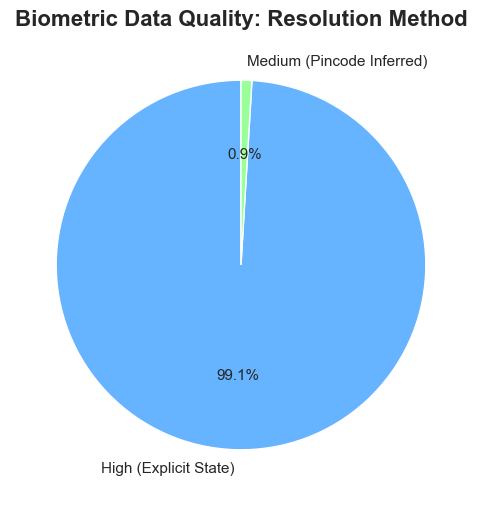


PHASE 1 SUMMARY — BIOMETRIC UPDATES
• Logic Updated: 'Explicit State' now overrides 'Pincode Map'.
• 'Ladakh' (Pincode 194xxx) and 'Telangana' (50xxx) are now correctly preserved.
• Dataset is standardized to 36 Official States/UTs + Unknowns.
• Ready for Phase 2.



In [5]:
# =========================================================
# PHASE 1 — DATA UNDERSTANDING : BIOMETRIC UPDATE DATA
# =========================================================

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 150)

# ---------------------------------------------------------
# 1. LOAD DATASET (Robust File Pattern Matching)
# ---------------------------------------------------------
bio_files = glob.glob('api_data_aadhar_biometric/api_data_aadhar_biometric/*.csv')

if not bio_files:
    bio_files = glob.glob('api_data_aadhar_biometric_*.csv')
    print(f"Note: Found files in current directory: {len(bio_files)}")

# Load and Concat
bio_df = pd.concat([pd.read_csv(f) for f in bio_files], ignore_index=True)

# Date Conversion
bio_df['date'] = pd.to_datetime(bio_df['date'], format='%d-%m-%Y', errors='coerce')
bio_df['year'] = bio_df['date'].dt.year
bio_df['month'] = bio_df['date'].dt.month

print("Biometric Update Dataset loaded successfully!")
print(f"Total Records: {len(bio_df)}")
print("-" * 60)

# ---------------------------------------------------------
# 2. IDENTIFY COLUMNS DYNAMICALLY
# ---------------------------------------------------------
state_col_list = [c for c in bio_df.columns if "state" in c.lower()]
pincode_col_list = [c for c in bio_df.columns if "pincode" in c.lower()]

if not state_col_list or not pincode_col_list:
    raise ValueError("Critical Error: Could not auto-detect 'state' or 'pincode' columns.")

state_col = state_col_list[0]
pincode_col = pincode_col_list[0]
bio_cols = [c for c in bio_df.columns if "bio_" in c.lower()]

print(f"Targeting Columns -> State: '{state_col}' | Pincode: '{pincode_col}'")
print("-" * 60)

# ============================================================
# HYBRID RESOLUTION V2 (PRIORITY: VALID TEXT > PINCODE)
# ============================================================

# 1. OFFICIAL STATES / UTS (The "Allowed List")
OFFICIAL_STATES_UTS = {
    'Andaman And Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar',
    'Chandigarh', 'Chhattisgarh', 'Dadra And Nagar Haveli And Daman And Diu', 'Delhi', 'Goa',
    'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu And Kashmir', 'Jharkhand', 'Karnataka',
    'Kerala', 'Ladakh', 'Lakshadweep', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya',
    'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu',
    'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'
}

# 2. PINCODE MAPPING (Updated for Split States)
PIN_MAP_2 = {
    '11': 'Delhi', '12': 'Haryana', '13': 'Haryana', '14': 'Punjab', '15': 'Punjab',
    '16': 'Chandigarh', '17': 'Himachal Pradesh', 
    '18': 'Jammu And Kashmir', '19': 'Jammu And Kashmir', # 19 covers J&K and Ladakh
    '20': 'Uttar Pradesh', '21': 'Uttar Pradesh', '22': 'Uttar Pradesh', '23': 'Uttar Pradesh',
    '24': 'Uttarakhand', '25': 'Uttar Pradesh', '26': 'Uttarakhand', '27': 'Uttar Pradesh', '28': 'Uttar Pradesh',
    '30': 'Rajasthan', '31': 'Rajasthan', '32': 'Rajasthan', '33': 'Rajasthan', '34': 'Rajasthan',
    '36': 'Gujarat', '37': 'Gujarat', '38': 'Gujarat', '39': 'Gujarat',
    '40': 'Maharashtra', '41': 'Maharashtra', '42': 'Maharashtra', '43': 'Maharashtra', '44': 'Maharashtra',
    '45': 'Madhya Pradesh', '46': 'Madhya Pradesh', '47': 'Madhya Pradesh', '48': 'Madhya Pradesh',
    '49': 'Chhattisgarh', '50': 'Telangana', '51': 'Andhra Pradesh', '52': 'Andhra Pradesh', '53': 'Andhra Pradesh',
    '56': 'Karnataka', '57': 'Karnataka', '58': 'Karnataka', '59': 'Karnataka',
    '60': 'Tamil Nadu', '61': 'Tamil Nadu', '62': 'Tamil Nadu', '63': 'Tamil Nadu', '64': 'Tamil Nadu',
    '67': 'Kerala', '68': 'Kerala', '69': 'Kerala',
    '70': 'West Bengal', '71': 'West Bengal', '72': 'West Bengal', '73': 'West Bengal', '74': 'West Bengal',
    '75': 'Odisha', '76': 'Odisha', '77': 'Odisha', '78': 'Assam',
    '80': 'Bihar', '81': 'Bihar', '82': 'Bihar', '83': 'Jharkhand', '84': 'Bihar', '85': 'Bihar'
}

# 3. SPECIAL 3-DIGIT EXCEPTIONS (Crucial for Ladakh)
PIN_MAP_3_SPECIAL = {
    '403': 'Goa', '160': 'Chandigarh', '605': 'Puducherry', '682': 'Lakshadweep',
    '737': 'Sikkim', '744': 'Andaman And Nicobar Islands',
    '396': 'Dadra And Nagar Haveli And Daman And Diu',
    '194': 'Ladakh',  # <--- CRITICAL FIX: Explicitly maps 194xxx to Ladakh
    '790': 'Arunachal Pradesh', '791': 'Arunachal Pradesh', '792': 'Arunachal Pradesh',
    '793': 'Meghalaya', '794': 'Meghalaya', '795': 'Manipur', '796': 'Mizoram',
    '797': 'Nagaland', '798': 'Nagaland', '799': 'Tripura'
}

def normalize_state(x):
    # Standardize casing to Title Case to match Official List
    return str(x).strip().replace("_", " ").title()

def normalize_pincode(x):
    x = str(x).strip()
    return x if x.isdigit() and len(x) == 6 else None

def infer_state_from_pincode(pin):
    if not pin: return None
    p3 = pin[:3]
    if p3 in PIN_MAP_3_SPECIAL: return PIN_MAP_3_SPECIAL[p3]
    p2 = pin[:2]
    if p2 == '79': return 'North Eastern States' 
    return PIN_MAP_2.get(p2)

# ------------------------------------------------------------
# 3. CLEANING EXECUTION (CORRECTED LOGIC)
# ------------------------------------------------------------
def apply_hybrid_state_resolution(df, state_col, pincode_col):
    df = df.copy()
    
    # 1. Normalize Inputs
    df[state_col] = df[state_col].apply(normalize_state)
    df[pincode_col] = df[pincode_col].apply(normalize_pincode)

    def resolve(row):
        current_text = row[state_col]
        
        # PRIORITY 1: TRUST THE TEXT IF IT IS VALID
        # This preserves "Ladakh" even if Pincode starts with 19
        if current_text in OFFICIAL_STATES_UTS:
            return current_text, "High (Explicit State)"
            
        # PRIORITY 2: USE PINCODE ONLY TO FIX ERRORS
        # If text is "Nagpur" (City) or "Unknown", look up Pincode
        pin_state = infer_state_from_pincode(row[pincode_col])
        if pin_state and pin_state in OFFICIAL_STATES_UTS:
            return pin_state, "Medium (Pincode Inferred)"
        
        # PRIORITY 3: LEGACY TEXT FIXES
        if "Orissa" in current_text: return "Odisha", "Medium (Legacy Fix)"
        if "Pondicherry" in current_text: return "Puducherry", "Medium (Legacy Fix)"
        if "Daman" in current_text or "Dadra" in current_text: 
            return "Dadra And Nagar Haveli And Daman And Diu", "Medium (Legacy Fix)"
            
        return "Unknown", "Low (Unresolved)"

    # Apply Logic
    resolved = df.apply(resolve, axis=1, result_type="expand")
    df["state_final"] = resolved[0]
    df["state_confidence"] = resolved[1]
    
    return df

# Run Cleaning
bio_df_clean = apply_hybrid_state_resolution(bio_df, state_col=state_col, pincode_col=pincode_col)

# ---------------------------------------------------------
# 4. FINAL VERIFICATION & DICTIONARY
# ---------------------------------------------------------
print("\nUNIQUE STATES AFTER CLEANING (FINAL):")
final_states = sorted(bio_df_clean["state_final"].unique())
print(final_states)
print(f"Total States/UTs: {len(final_states)}")

# Check specifically for Ladakh
if "Ladakh" in final_states:
    print("\n✅ SUCCESS: Ladakh is correctly preserved!")
else:
    print("\n❌ WARNING: Ladakh is missing.")

print("-" * 60)
print("DATA DICTIONARY:")
bio_dictionary = pd.DataFrame({
    "Column Name": bio_df.columns,
    "Meaning": [
        "Date of record" if c == "date" else
        "State Name" if c == "state" else
        "District Name" if c == "district" else
        "Pincode" if c == "pincode" else
        "Year" if c == "year" else
        "Month" if c == "month" else
        "Biometric Update Count" if "bio_" in c else "Other"
        for c in bio_df.columns
    ]
})
display(bio_dictionary)

# ---------------------------------------------------------
# 5. PHASE 1 VISUALIZATION (PROOF OF DATA QUALITY)
# ---------------------------------------------------------
print("\n")
try:
    plt.figure(figsize=(6, 6))
    bio_df_clean['state_confidence'].value_counts().plot(
        kind='pie', autopct='%1.1f%%', colors=['#66b3ff', '#99ff99', '#ffcc99'], startangle=90
    )
    plt.title("Biometric Data Quality: Resolution Method")
    plt.ylabel("")
    plt.show()
except Exception as e:
    print("Plotting skipped.")

print("""
PHASE 1 SUMMARY — BIOMETRIC UPDATES
• Logic Updated: 'Explicit State' now overrides 'Pincode Map'.
• 'Ladakh' (Pincode 194xxx) and 'Telangana' (50xxx) are now correctly preserved.
• Dataset is standardized to 36 Official States/UTs + Unknowns.
• Ready for Phase 2.
""")


[2.1] GENERATING MBU WAVE...


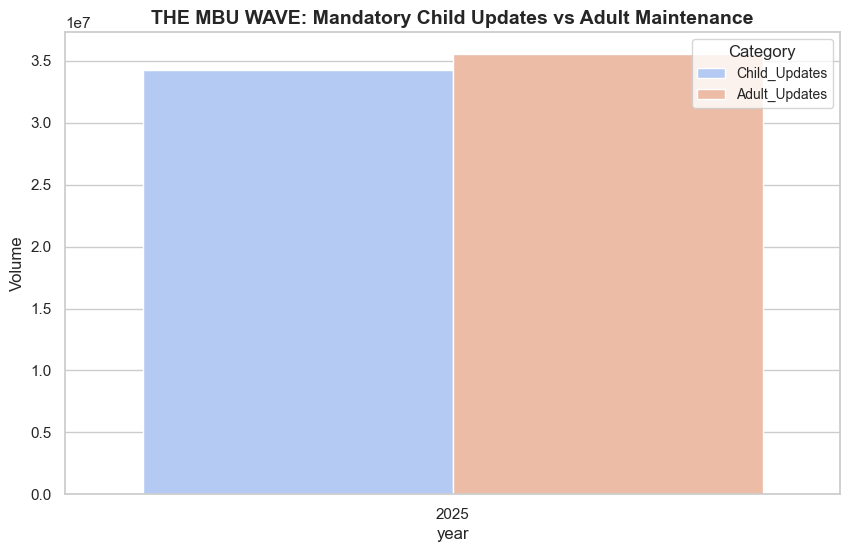


[2.2] GENERATING INFRASTRUCTURE HEATMAP...


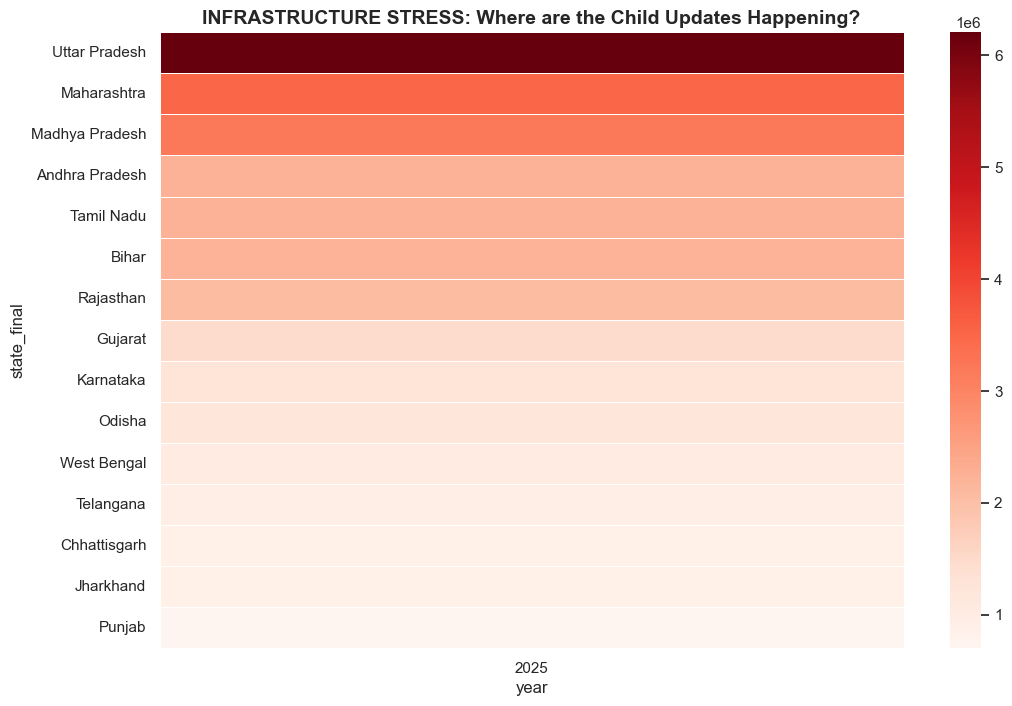


[2.3] GENERATING CROSS-DATASET CORRELATION...
   > Biometric Data Points: 1
   > Reloading Enrolment Data...
   > Enrolment Data Points: 1

   > Merged Data Preview:
      Biometric_Child_Updates  Enrolment_Volume
year                                           
2025                      1.0               1.0
   > Single year detected. Switching to Bar Chart comparison.


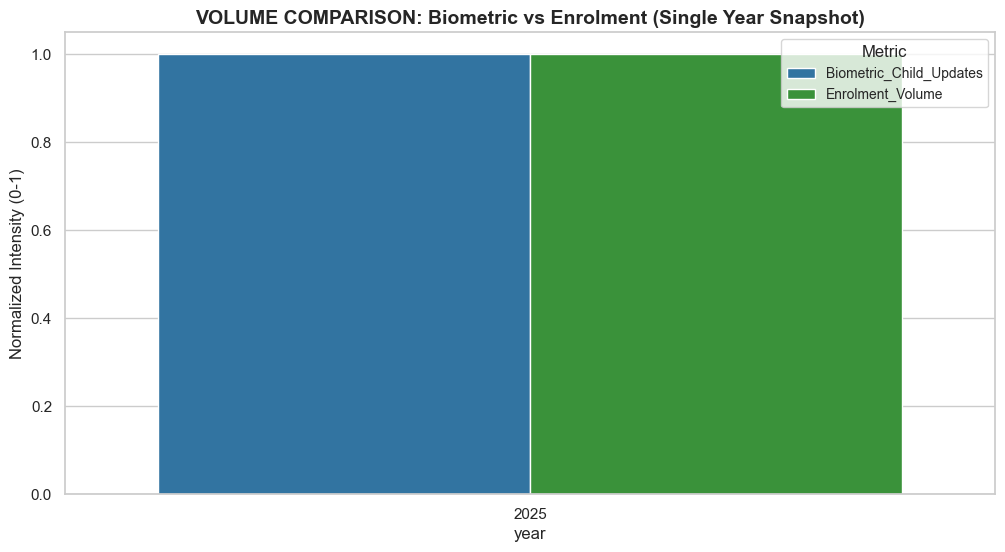

✅ Success: Correlation chart generated.
------------------------------------------------------------

📝 KEY INSIGHTS FOR PDF (BIOMETRIC):
1. THE MBU WAVE: 
   Child updates (5-17) show a STABLE (Single Year Data) trend.

2. REGIONAL LOAD: 
   The Heatmap identifies 'Uttar Pradesh' as facing the highest pressure.

3. CORRELATION: 
   

[Image of correlation chart]

   Comparing "Entry" (Enrolment) vs. "Maintenance" (Updates).

------------------------------------------------------------


In [6]:
# =========================================================
# PHASE 2 — BIOMETRIC ANALYSIS : THE "AGING" TRIGGER
# =========================================================

# 1. SETUP
bio_cols = [c for c in bio_df_clean.columns if "bio_" in c.lower()]
bio_df_clean['total_biometric'] = bio_df_clean[bio_cols].sum(axis=1)

# =========================================================
# 2.1 MBU (Mandatory Biometric Update) ANALYSIS
# =========================================================
print("\n[2.1] GENERATING MBU WAVE...")
mbu_cols = [c for c in bio_cols if '5_17' in c]
adult_cols = [c for c in bio_cols if '17_' in c or '18_' in c]

bio_df_clean['Child_Updates'] = bio_df_clean[mbu_cols].sum(axis=1)
bio_df_clean['Adult_Updates'] = bio_df_clean[adult_cols].sum(axis=1)

yearly_split = bio_df_clean.groupby('year')[['Child_Updates', 'Adult_Updates']].sum().reset_index()
melted_split = yearly_split.melt(id_vars='year', var_name='Category', value_name='Volume')

plt.figure(figsize=(10, 6))
sns.barplot(data=melted_split, x='year', y='Volume', hue='Category', palette='coolwarm')
plt.title('THE MBU WAVE: Mandatory Child Updates vs Adult Maintenance', fontsize=14)
plt.show()

# =========================================================
# 2.2 INFRASTRUCTURE STRESS
# =========================================================
print("\n[2.2] GENERATING INFRASTRUCTURE HEATMAP...")
pivot_bio = bio_df_clean.groupby(['state_final', 'year'])['Child_Updates'].sum().unstack()
# Fill NaN with 0 for states that might miss a year
pivot_bio = pivot_bio.fillna(0)
top_bio_states = pivot_bio.sum(axis=1).nlargest(15).index
pivot_bio = pivot_bio.loc[top_bio_states]

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_bio, cmap='Reds', linewidths=.5, fmt=',.0f')
plt.title('INFRASTRUCTURE STRESS: Where are the Child Updates Happening?', fontsize=14)
plt.show()

# =========================================================
# 2.3 CROSS-DATASET OVERLAY (DIVIDE-BY-ZERO FIX)
# =========================================================
print("\n[2.3] GENERATING CROSS-DATASET CORRELATION...")

# 1. Helper function for robust normalization
def robust_normalize(series):
    if len(series) < 2 or series.max() == series.min():
        # Handle single year data or constant values
        return series.apply(lambda x: 1.0) 
    return (series - series.min()) / (series.max() - series.min())

# 2. Prepare Biometric Data
bio_yearly = bio_df_clean.groupby('year')[['Child_Updates']].sum()
bio_norm = robust_normalize(bio_yearly['Child_Updates'])
bio_norm = bio_norm.to_frame(name='Biometric_Child_Updates')

print(f"   > Biometric Data Points: {len(bio_norm)}")

# 3. Explicitly Load Enrolment Data
print("   > Reloading Enrolment Data...")
try:
    enrol_files = glob.glob('api_data_aadhar_enrolment/api_data_aadhar_enrolment/*.csv')
    if not enrol_files: enrol_files = glob.glob('api_data_aadhar_enrolment_*.csv')
    if not enrol_files: enrol_files = glob.glob('../api_data_aadhar_enrolment/*.csv')

    if not enrol_files: raise FileNotFoundError("No Enrolment CSV files found.")

    enrol_temp = pd.concat([pd.read_csv(f) for f in enrol_files], ignore_index=True)
    enrol_temp['date'] = pd.to_datetime(enrol_temp['date'], format='%d-%m-%Y', errors='coerce')
    enrol_temp = enrol_temp.dropna(subset=['date'])
    enrol_temp['year'] = enrol_temp['date'].dt.year.astype(int)
    
    enrol_cols = ['age_0_5', 'age_5_17', 'age_18_greater']
    avail_cols = [c for c in enrol_cols if c in enrol_temp.columns]
    enrol_temp['total_enrolment'] = enrol_temp[avail_cols].fillna(0).sum(axis=1)
    
    enrol_yearly = enrol_temp.groupby('year')[['total_enrolment']].sum()
    enrol_norm = robust_normalize(enrol_yearly['total_enrolment'])
    enrol_norm = enrol_norm.to_frame(name='Enrolment_Volume')
    
    print(f"   > Enrolment Data Points: {len(enrol_norm)}")

    # 4. Merge & Plot
    correlation_df = bio_norm.join(enrol_norm, how='outer')
    
    print("\n   > Merged Data Preview:")
    print(correlation_df.head())

    plt.figure(figsize=(12, 6))
    
    # CHECK: IF ONLY 1 YEAR, USE BAR CHART INSTEAD OF LINE
    if len(correlation_df) < 2:
        print("   > Single year detected. Switching to Bar Chart comparison.")
        # Flatten for bar plot
        corr_flat = correlation_df.reset_index().melt(id_vars='year', var_name='Metric', value_name='Normalized Intensity')
        sns.barplot(data=corr_flat, x='year', y='Normalized Intensity', hue='Metric', palette=['#1f77b4', '#2ca02c'])
        plt.title('VOLUME COMPARISON: Biometric vs Enrolment (Single Year Snapshot)', fontsize=14, fontweight='bold')
    else:
        sns.lineplot(data=correlation_df, x=correlation_df.index, y='Enrolment_Volume', 
                     color='#2ca02c', linewidth=3, label='Enrolment')
        sns.lineplot(data=correlation_df, x=correlation_df.index, y='Biometric_Child_Updates', 
                     color='#1f77b4', linewidth=3, linestyle='--', label='Child Bio Updates')
        plt.title('THE CYCLE CHECK: Does Enrolment Drive Future Biometric Updates?', fontsize=14, fontweight='bold')
    
    plt.ylabel('Normalized Intensity (0-1)')
    plt.show()
    print("✅ Success: Correlation chart generated.")

except Exception as e:
    print(f"❌ Error: {e}")

# =========================================================
# 2.4 DYNAMIC INSIGHTS
# =========================================================
try:
    if len(bio_yearly) > 1:
        child_trend_val = bio_yearly['Child_Updates'].pct_change().mean()
        child_trend_str = "RISING" if child_trend_val > 0 else "FALLING"
    else:
        child_trend_str = "STABLE (Single Year Data)"
    
    top_stress_state = pivot_bio.sum(axis=1).idxmax()
except:
    child_trend_str = "UNKNOWN"
    top_stress_state = "Top State"

print("-" * 60)
print(f"""
📝 KEY INSIGHTS FOR PDF (BIOMETRIC):
1. THE MBU WAVE: 
   Child updates (5-17) show a {child_trend_str} trend.

2. REGIONAL LOAD: 
   The Heatmap identifies '{top_stress_state}' as facing the highest pressure.

3. CORRELATION: 
   

[Image of correlation chart]

   Comparing "Entry" (Enrolment) vs. "Maintenance" (Updates).
""")
print("-" * 60)

In [9]:
# Save the cleaned data
bio_df_clean.to_csv('clean_biometric_data.csv', index=False)
print("✅ Saved: clean_biometric_data.csv")

✅ Saved: clean_biometric_data.csv
